In [1]:
__nbid__ = '0026'
__author__  = 'Knut Olsen <knut.olsen@noirlab.edu>, Alice Jacques <alice.jacques@noirlab.edu>, David Herrera <david.herrera@noirlab.edu>, Astro Data Lab Team <datalab@noirlab.edu>'
__version__ = '20251205' # aaaammdd
__datasets__ = ['nsc_dr2', 'gaia_dr3']
__keywords__ = ['Pal5', 'joint query', 'plot:cmd', 'plot:histogram', 'plot:quiver', 'convolution', 'proper motions']

# Las Colas de Marea de Palomar 5

*Knut Olsen, Alice Jacques y el equipo de Astro Data Lab*

#### (_Traducción de [Palomar5InNSCGaia.ipynb](https://github.com/astro-datalab/notebooks-latest/blob/master/03_ScienceExamples/Pal5TidalTails/Palomar5InNSCGaia.ipynb)_)

### Tabla de contenido
* [Objetivos y resumen](#goals)
* [Avisos Legales y atribuciones](#attribution)
* [Importaciones y configuración](#import)
* [Autenticación](#login)
* [Consulta conjunta de NSC DR2 y Gaia DR3](#photometry)
* [Aislando Palomar 5](#isolate)
* [Filtrado espacial](#filter)
* [Explorando los movimientos propios](#propermotions)

<a class="anchor" id="goals"></a>
# Objetivos
* Aprender a utilizar una tabla de coincidencias cruzadas previamente calculada para realizar una consulta conjunta en dos conjuntos de datos, NSC DR2 y Gaia DR3.
* Demostrar la aplicación de un filtro en el espacio color-magnitud para aislar la población estelar Palomar 5
* Utilizar un filtro de convolución espacial para revelar y mejorar las colas de marea de Palomar 5
* Aplicar filtros de movimiento propios para mejorar aún más las colas de marea

# Resumen

En este notebook, demostramos la identificación de las colas de marea del cúmulo globular Palomar 5 en el catálogo NSC DR2, así como una unión con Gaia DR3 para explorar el movimiento propio del cúmulo y sus colas. Emitimos una consulta sobre la posición del cúmulo globular y recuperamos todos los datos de NSC DR2 dentro de un área del cielo, así como información de Gaia DR3 para cualquier objeto que tenga coincidencias.

Este notebook utiliza una tabla de coincidencias cruzadas previamente calculada en Astro Data Lab. Para obtener más información sobre nuestras tablas de coincidencias cruzadas precalculadas, consulte nuestro notebook de Jupyter en [Cómo utilizar las tablas de coincidencias cruzadas previas en Astro Data Lab](https://github.com/astro-datalab/notebooks-latest-es/blob/master/04_ComoHacer/TablasCruzadas/Como_usar_tablas_previamente_cruzadas.ipynb), así como nuestros [Ejemplos que utilizan las tablas previamente cruzadas en Astro Data Lab](https://github.com/astro-datalab/notebooks-latest-es/blob/master/04_ComoHacer/TablasCruzadas/Ejemplos_usando_tablas_previamente_cruzadas.ipynb).

### Antecedentes

[Odenkirchen M. et al., 2001, ApJ, 548, L165](https://ui.adsabs.harvard.edu/abs/2001ApJ...548L.165O/abstract) encontraron colas de marea extendidas alrededor del cúmulo globular Palomar 5 utilizando datos del SDSS. Las colas indican que el cúmulo está en proceso de evaporación. Son graficadores útiles del potencial gravitacional de la Vía Láctea y son sondas potenciales de subhalos discretos de materia oscura en la Vía Láctea.

### Recuperación de datos

Usaremos los datos del catálogo que se encuentran en tres tablas: la tabla de objetos NSC DR2, la tabla de coincidencias cruzadas Gaia DR3-NSC DR2 y la tabla fuente Gaia DR3.

### Detección

Para seleccionar las colas de marea, filtraremos los resultados del catálogo NSC DR2 para aislar la secuencia Pal 5 y luego ejecutaremos un filtro de convolución diferencial de la distribución espacial para resaltar las colas. Luego exploraremos los movimientos propios del cúmulo y las colas utilizando los datos de Gaia DR3.

<a class="anchor" id="attribution"></a>
# Avisos Legales y atribuciones

Avisos Legales
-----------
Tome en cuenta que usar el Astro Data Lab constituye un acuerdo con nuestros [Avisos Legales](https://datalab.noirlab.edu/disclaimers.php) mínimos.

Reconocimientos
---------------
Si ud. usa el **Astro Data Lab** en sus publicaciones de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios de datos proveeidos por el Astro Data Lab, el cual es parte del Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) del NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc."(Asociación de Universidaddes para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

Si utiliza **SPARCL junto con la plataforma de Astro Data Lab** (por medio de JupyterLab, línea de comando o interfaz de la web) en su publicación de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios o datos proporcionados por el "SPectra Analysis and Retrievable Catalog Lab" (SPARCL) (Laboratorio de Análisis y Catálogo Recuperable de Espectros) y el Astro Data Lab, ambos pertenecientes al Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) de NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc." (Asociación de Universidades para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

En cualquiera de los casos, **por favor cite las siguientes publicaciones**:

* Publicación del concepto de Data Lab: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Descripción general del Astro Data Lab: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411.

Si hace referencia al Jupyterlab / Jupyter notebooks de Data Lab, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097.

Si publica en una revista de la AAS, agregue también la palabra clave `\facility{Astro Data Lab}`

Y si está usando SPARCL, por vor agregue también `\software{SPARCL}` y cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576.

La biblioteca de NOIRLab mantiene [listas de reconocimientos apropiados](https://noirlab.edu/science/about/scientific-acknowledgments) para usar cuando se hacen publicaciones utilizando los recursos, servicios o datos del Laboratorio.

---- **Versión en Inglés** ----


# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/disclaimers.php).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.


<a class="anchor" id="import"></a>
# Importaciones e inicialización

In [1]:
# Biblioteca estándar
from getpass import getpass

# De terceros
import numpy as np
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import utils, io, convolution, wcs
from astropy.coordinates import name_resolve
import astropy.units as u
import matplotlib.pyplot as plt
%matplotlib inline

# De DataLab
from dl import authClient as ac, queryClient as qc
from dl.helpers.utils import convert

In [2]:
# # Configuración de gráficas
settings = {
    'font.size':16,
    'axes.linewidth':1.0,
    'xtick.major.size':3.0,
    'xtick.minor.size':1.0,
    'xtick.major.width':2.0,
    'xtick.minor.width':0.5,
    'xtick.direction':'in', 
    'xtick.minor.visible':True,
    'xtick.top':True,
    'ytick.major.size':3.0,
    'ytick.minor.size':1.0,
    'ytick.major.width':2.0,
    'ytick.minor.width':0.5,
    'ytick.direction':'in', 
    'ytick.minor.visible':True,
    'ytick.right':True
}

plt.rcParams.update(**settings)

<a class="anchor" id="login"></a>
# Autenticación
Se puede acceder a gran parte de la funcionalidad de Data Lab sin iniciar sesión explícitamente (el servicio utiliza un inicio de sesión anónimo). Sin embargo, algunas funciones, como guardar los resultados de las consultas en el espacio de almacenamiento virtual, requieren iniciar sesión (es decir, necesitará una cuenta de usuario registrada).

Si necesita iniciar sesión en Data Lab, descomente la celda a continuación y ejecútela:

In [ ]:
# token = ac.login(input("Ingrese el nombre de usuario: (+ENTER) "), getpass("Ingrese la contraseña: (+ENTER) "))
# ac.quiénAmI()

<a class="anchor" id="photometry"></a>
# Coordenadas, fotometría y datos de movimiento propios alrededor de Pal 5
Resolvemos las posiciones de Pal 5 y consultamos la base de datos en busca de estrellas a su alrededor.  Describiremos el inicio de sesión con un poco de detalle a continuación.

In [3]:
try:
    c = name_resolve.get_icrs_coordinates('Palomar 5')
except:
    coord_str="15 16 05.30 -00 06 41.0"
    c=SkyCoord(coord_str,unit=(u.hourangle, u.deg))

### Lógica de consulta

El objetivo de la consulta es recuperar todas las estrellas de NSC DR2 dentro de un radio significativo de Pal 5, en este caso, 2 grados.  También queremos recuperar mediciones de Gaia DR3 cuando esté disponible. Este tipo de consulta se conoce como LEFT JOIN: queremos obtener *todos* los datos de una tabla (`nsc_dr2.object`), así como todos los datos que se cruzan (a través de una coincidencia cruzada) con otra tabla (`gaia_dr3.gaia_source`).

En lugar de realizar la comparación posicional sobre la marcha, utilizaremos una tabla de coincidencia cruzada previamente calculada (`gaia_dr3.x1p5__gaia_source__nsc_dr2__object`) a la que necesitamos INNER JOIN con la tabla fuente de Gaia (`gaia_dr3.gaia_source`) para poder acceder a las mediciones de Gaia.

La lógica de la consulta entonces es la siguiente:
- UNIR (JOIN) a la tabla de coincidencias cruzadas con la tabla fuente de Gaia, sujeto a la restricción espacial de estar dentro de los 2 grados de Pal 5, y materialice esta tabla en la consulta (la llamaremos "gt")
- Realizar la UNIÓN IZQUIERDA de nsc_dr2 con esta tabla materializada y restrinja nsc_dr2 para que también contenga fuentes dentro de 2 grados de Pal 5
- Devolver filas tanto de nsc_dr2 como de gaia_dr3. Si hay objetos en nsc_dr2 que no tienen coincidencia cruzada gaia_dr3, las columnas Gaia para esos objetos serán nulas.

In [4]:
radius = 2.0
query2 = """
    SELECT 
    n.id, n.ra, n.dec, n.pmra, n.pmdec, n.pmraerr, n.pmdecerr, n.mjd, n.umag, n.uerr,
    n.gmag, n.gerr, n.rmag, n.rerr, n.imag, n.ierr, n.zmag, n.zerr, gt.*
    FROM 
    nsc_dr2.object AS n
    LEFT JOIN (
    SELECT 
        x.id1 as gaia_id, x.id2 as nsc_id, x.ra1 as gaia_ra, x.dec1 as gaia_dec, x.distance as dist,
        g.phot_g_mean_mag as gaia_G, g.pmra as gaia_pmra, g.pmra_error as gaia_pmra_err,
        g.pmdec as gaia_pmdec, g.pmdec_error as gaia_pmdec_err, g.parallax, g.parallax_error,
        g.bp_rp, g.astrometric_excess_noise, g.astrometric_excess_noise_sig, g.duplicated_source
    FROM 
        gaia_dr3.gaia_source AS g
    INNER JOIN 
        gaia_dr3.x1p5__gaia_source__nsc_dr2__object AS x
    ON 
        g.source_id = x.id1
    WHERE 
        (q3c_radial_query(g.ra,g.dec,{0},{1},{2}))
    ) AS gt
    ON 
        n.id = gt.nsc_id
    WHERE 
    (q3c_radial_query(n.ra,n.dec,{0},{1},{2}))
    """.format(c.ra.value,c.dec.value,radius)

print(query2)


    SELECT 
    n.id, n.ra, n.dec, n.pmra, n.pmdec, n.pmraerr, n.pmdecerr, n.mjd, n.umag, n.uerr,
    n.gmag, n.gerr, n.rmag, n.rerr, n.imag, n.ierr, n.zmag, n.zerr, gt.*
    FROM 
    nsc_dr2.object AS n
    LEFT JOIN (
    SELECT 
        x.id1 as gaia_id, x.id2 as nsc_id, x.ra1 as gaia_ra, x.dec1 as gaia_dec, x.distance as dist,
        g.phot_g_mean_mag as gaia_G, g.pmra as gaia_pmra, g.pmra_error as gaia_pmra_err,
        g.pmdec as gaia_pmdec, g.pmdec_error as gaia_pmdec_err, g.parallax, g.parallax_error,
        g.bp_rp, g.astrometric_excess_noise, g.astrometric_excess_noise_sig, g.duplicated_source
    FROM 
        gaia_dr3.gaia_source AS g
    INNER JOIN 
        gaia_dr3.x1p5__gaia_source__nsc_dr2__object AS x
    ON 
        g.source_id = x.id1
    WHERE 
        (q3c_radial_query(g.ra,g.dec,229.022083,-0.111389,2.0))
    ) AS gt
    ON 
        n.id = gt.nsc_id
    WHERE 
    (q3c_radial_query(n.ra,n.dec,229.022083,-0.111389,2.0))
    


In [5]:
dfx = qc.query(sql=query2,fmt='pandas')
print(f"Filas en la tabla resultante: {len(dfx)}")

Filas en la tabla resultante: 1083986


In [6]:
dfx.columns

Index(['id', 'ra', 'dec', 'pmra', 'pmdec', 'pmraerr', 'pmdecerr', 'mjd',
       'umag', 'uerr', 'gmag', 'gerr', 'rmag', 'rerr', 'imag', 'ierr', 'zmag',
       'zerr', 'gaia_id', 'nsc_id', 'gaia_ra', 'gaia_dec', 'dist', 'gaia_g',
       'gaia_pmra', 'gaia_pmra_err', 'gaia_pmdec', 'gaia_pmdec_err',
       'parallax', 'parallax_error', 'bp_rp', 'astrometric_excess_noise',
       'astrometric_excess_noise_sig', 'duplicated_source'],
      dtype='object')

### Examina la distribución adecuada del movimiento de Gaia.

In [6]:
pm = np.sqrt(dfx['gaia_pmra']**2+dfx['gaia_pmdec']**2)
pmerr = np.sqrt(dfx['gaia_pmra_err']**2+dfx['gaia_pmdec_err']**2)

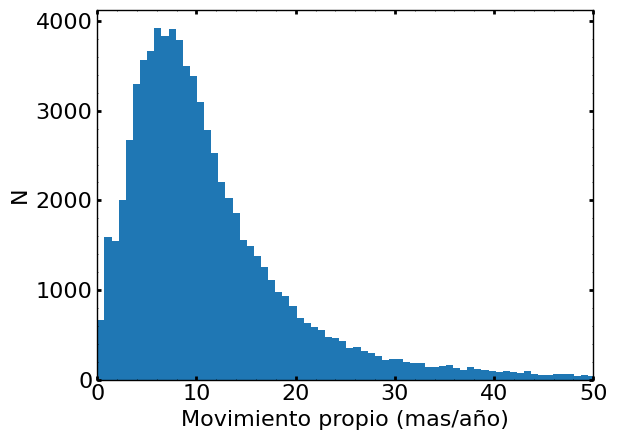

In [7]:
a,b,c=plt.hist(pm[~np.isnan(pm)],bins=1000)
plt.xlim(0,50)
plt.xlabel('Movimiento propio (mas/año)')
plt.ylabel('N')
plt.show()

### Seleccione objetos con alto movimiento propio (>15 mas/año)

In [8]:
hpm = (~np.isnan(pm)) & (pm>15)

Graficaremos una DCM g-r,g de los objetos y superpondremos en rojo aquellos con altos movimientos propios de Gaia.  Tenga en cuenta la secuencia principal de Pal 5 que se encuentra en NSC DR2, y que las estrellas de alto movimiento propio son todas estrellas del campo galáctico.

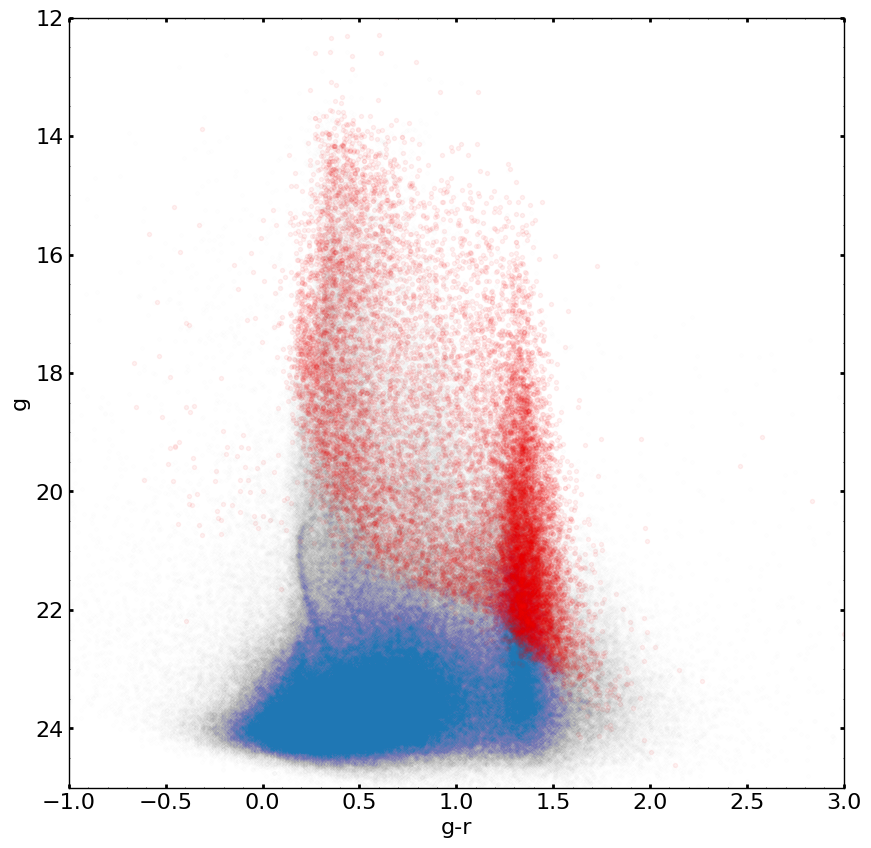

In [9]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.scatter(dfx['gmag']-dfx['rmag'],dfx['gmag'],marker='.',alpha=0.005)
ax1.scatter(dfx[hpm]['gmag']-dfx[hpm]['rmag'],dfx[hpm]['gmag'],marker='.',alpha=0.05,c='r')
ax1.set_xlim(-1,3)
ax1.set_ylim(25,12)
ax1.set_xlabel('g-r')
ax1.set_ylabel('g')
plt.show()

Hagamos un histograma 2D del CMD (un diagrama de Hess) para que podamos ver la secuencia de Pal 5 un poco más claramente.

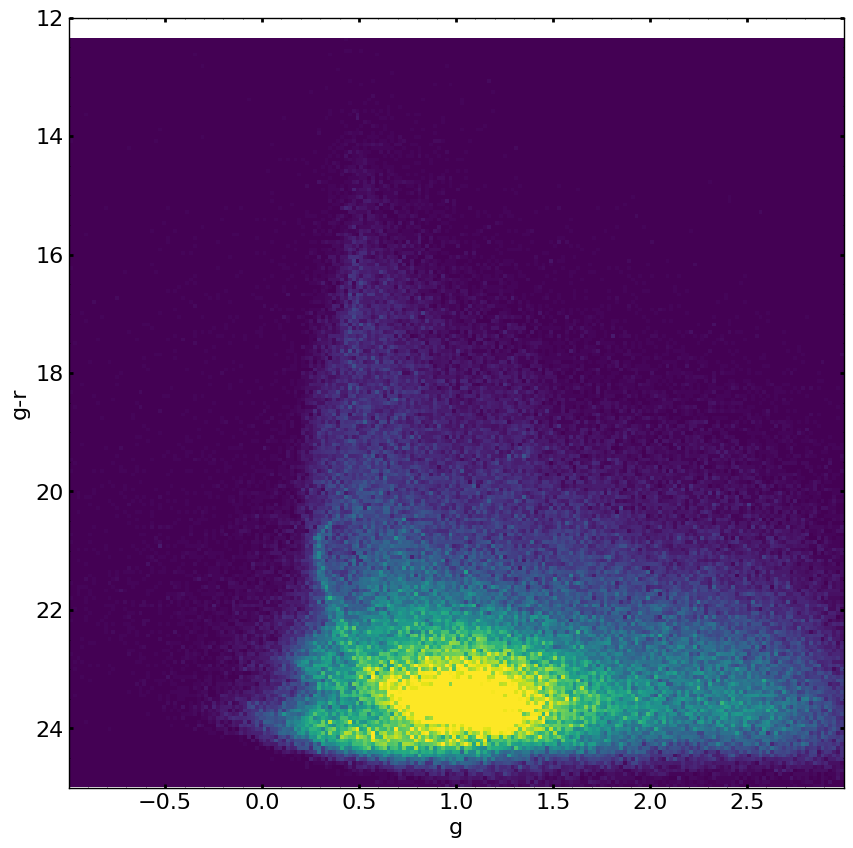

In [10]:
fig = plt.figure(figsize=(10,10))
x = dfx['gmag'] - dfx['imag']
y = dfx['gmag']
keep = (x>-1) & (x<3) & (y<25) & (y>12)
h2 = plt.hist2d(x[keep],y[keep],bins=200,vmin=0,vmax=75)
plt.ylim(25,12)
plt.xlabel('g')
plt.ylabel('g-r')
plt.show()

<a class="anchor" id="isolate"></a>
# Aislando Palomar 5
Para centrarnos en la población estelar Pal 5, haremos un corte de color y magnitud de 0,25<g-r<0,5 y 20<gmag<23.

In [11]:
p5 = (x>0.25) & (x<0.5) & (y<23) & (y>20)

In [12]:
dfp = dfx[p5]

Puedes ver un indicio de las colas de marea en este catálogo filtrado.

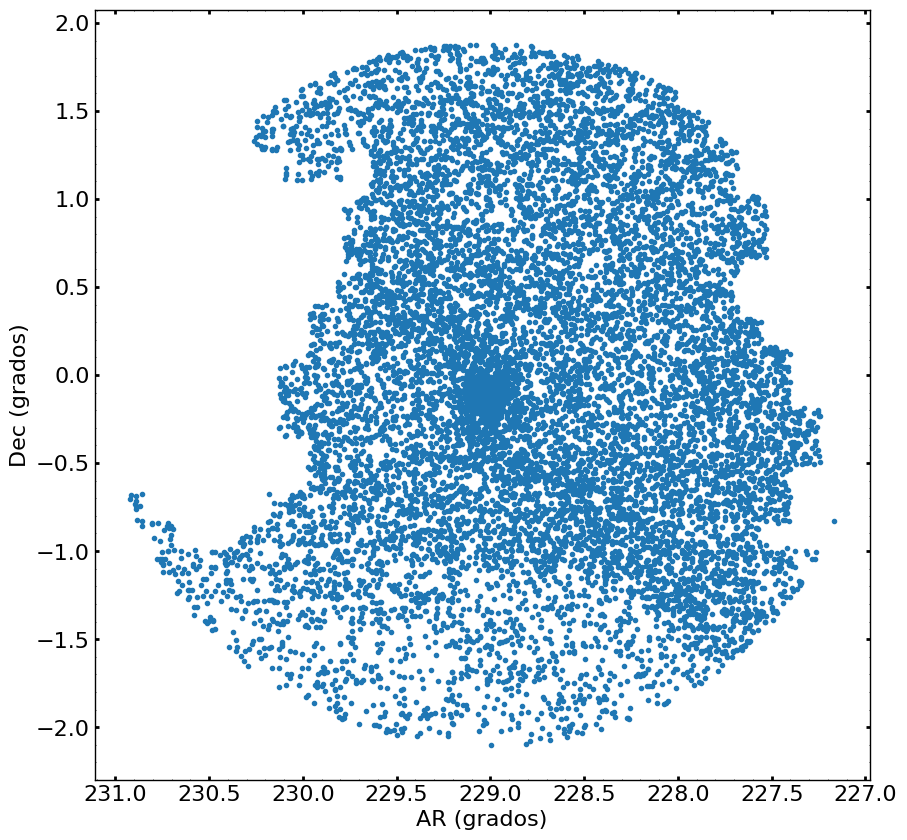

In [13]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.scatter(dfp['ra'],dfp['dec'],marker='.',alpha=1)
ax1.set_xlabel('AR (grados)')
ax1.set_ylabel('Dec (grados)')
plt.gca().invert_xaxis()
plt.show()

<a class="anchor" id="filter"></a>
# Filtrado espacial
Las colas las veremos más claramente si aplicamos un filtro espacial, aquí el mismo filtro de sombrero mexicano que usamos en el [notebook encontrando galaxias enanas](https://github.com/astro-datalab/notebooks-latest-es/blob/master/03_EjemplosDeCiencia/GalaxiasEnanas/GalaxiasEnanasEnNSCDR2.ipynb). En la siguiente figura, se puede ver claramente la forma de S de las colas de marea del cúmulo.

In [14]:
## un filtro de convolución
def dwarf_filter (ra,dec,fwhm_small=2.0,fwhm_big=20):

    """Convolución diferencial con núcleos gaussianos 2D.
    
       Basado en Koposov et al. (2008).
       Código de Ken Mighell y Mike Fitzpatrick.
       Ediciones menores por RN.
       
       Parámetros
       ----------
       ra, dec: flotante o matriz
           AR y Dec en grados.
    
       fwhm_small, fwhm_big: flotante
           Ancho máximo a mitad de altura de los núcleos gaussianos pequeños y grandes
           para usar en convolución, en minutos de arco.
    """
    
    x, y = ra, dec

    print("Calculando la convolución diferencial...")

    # Información sobre declinación (y) [grados]
    ymean = (y.min() + y.max()) / 2.0
    ydiff_arcmin = (y.max() - y.min()) * 60.0 # convertir de grados a minutos de arco

    # Información sobre la ascensión recta (x) [grados en el tiempo]:
    xdiff = x.max() - x.min() # separación angular [grados (tiempo)]
    xmean = (x.min() + x.max()) / 2.0

    # convertir de grados en tiempo a separación en grados angulares:
    xdiff_angular = (x.max() - x.min()) * np.cos(ymean*(np.pi/180.0))

    # convertir de grados a minutos de arco
    xdiff_angular_arcmin = xdiff_angular * 60.0 

    # Obtenga el número de píxeles de un minuto de arco en las direcciones X e Y:
    nx = np.rint(xdiff_angular_arcmin).astype('int')
    ny = np.rint(ydiff_arcmin).astype('int')

    # Cree un histograma bidimensional de los recuentos sin procesar:
    Counts, xedges, yedges  = np.histogram2d (x, y, (nx,ny) )
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    raw_hist = np.rot90(Counts).copy() # hackear la rareza pythonica

    # Haga los núcleos gaussianos pequeños y grandes con una desviación estándar
    # del FWHM dado en minutos de arco^2 píxeles.
    kernel_small = convolution.Gaussian2DKernel(fwhm_small/2.35,factor=1)
    kernel_big = convolution.Gaussian2DKernel(fwhm_big/2.35,factor=1)

    # Calcule los núcleos de convolución diferenciales.
    conv_big = convolution.convolve(raw_hist, kernel_big)
    conv_small = convolution.convolve(raw_hist, kernel_small)
    conv_delta = conv_small - conv_big
    delta = conv_delta.copy()

    # Calcular estadísticas y el piso.
    mean = np.mean(delta, dtype='float64')
    sigma = np.std(delta, dtype='float64')
    sigmaRaw = np.std(raw_hist,dtype='float64')
    median = np.median(delta) # no usado
    floor = mean

    clipped = delta.copy()
    clipped[delta < floor] = floor
    
    print("Listo.")

    # Devuelve los campos calculados.
    return raw_hist, extent, delta, clipped, sigma

In [15]:
raw_hist, extent, delta, clipped, sigma = \
    dwarf_filter(dfp['ra'],dfp['dec'],fwhm_small=8.0,fwhm_big=120)

Calculando la convolución diferencial...
Listo.


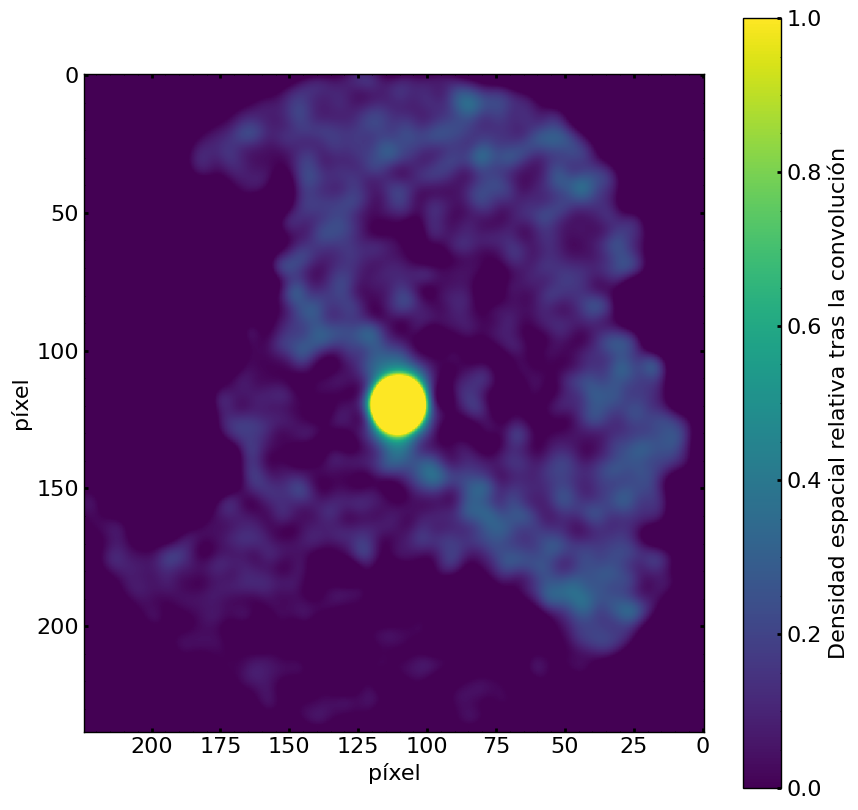

In [16]:
fig = plt.figure(figsize=(10,10))
im = plt.imshow(delta,vmin=0.0,vmax=1)
plt.gca().invert_xaxis()
plt.xlabel('píxel')
plt.ylabel('píxel')
plt.colorbar(label='Densidad espacial relativa tras la convolución')
plt.show()

<a class="anchor" id="propermotions"></a>
# Explorando los movimientos propios
Gaia DR3 tiene medidas de movimientos propios para algunos de los objetos en nuestro marco de datos.  Usaremos la [función carcaj de matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html) para graficarlos. En el gráfico siguiente, se puede ver que hay un movimiento masivo hacia el centro (alrededor de RA=229,0 y Dec=0,0), probablemente el movimiento reflejo del Sol.  El movimiento propio de Pal 5 es menor que el de la pantalla de primer plano.

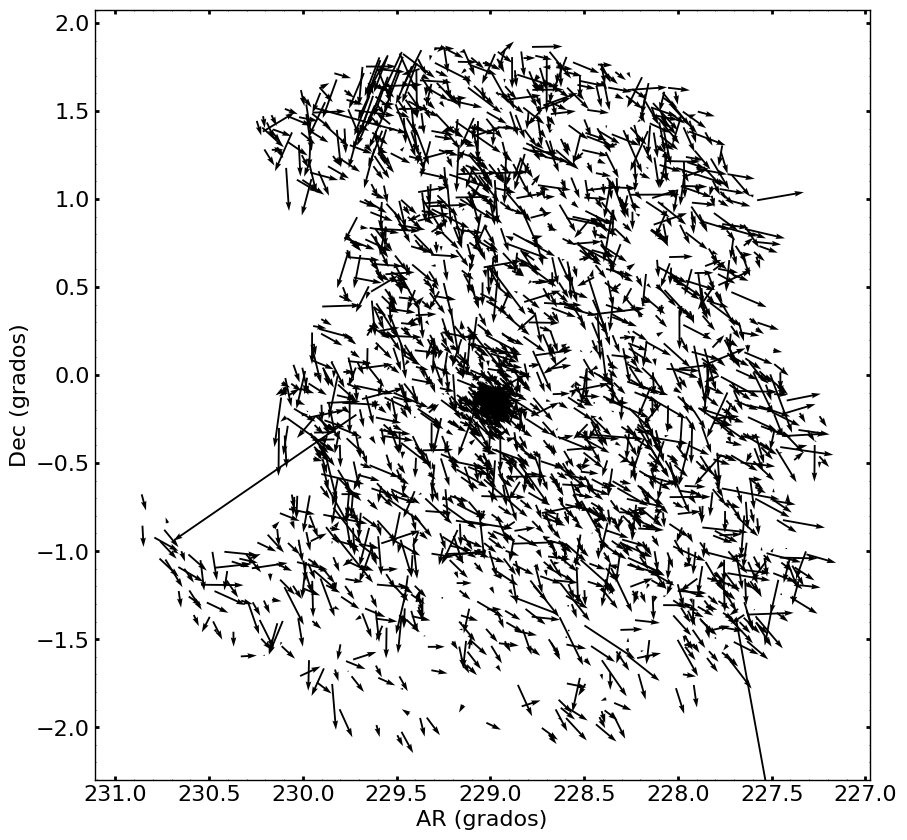

In [17]:
east_left = True
if east_left:
    flip = -1
else:
    flip = 1
x0 = dfp['ra']
y0 = dfp['dec']
dx = dfp['gaia_pmra']
dy = dfp['gaia_pmdec']

fig = plt.figure(figsize=(10,10))
plt.quiver(x0,y0,flip*dx,dy,scale_units='width',scale=200)
plt.xlabel('AR (grados)')
plt.ylabel('Dec (grados)')
if east_left: plt.gca().invert_xaxis()
plt.show()

Si limitamos la gráfica a aquellos objetos con movimientos propios más pequeños, Pal 5 y sus colas son más fáciles de ver.

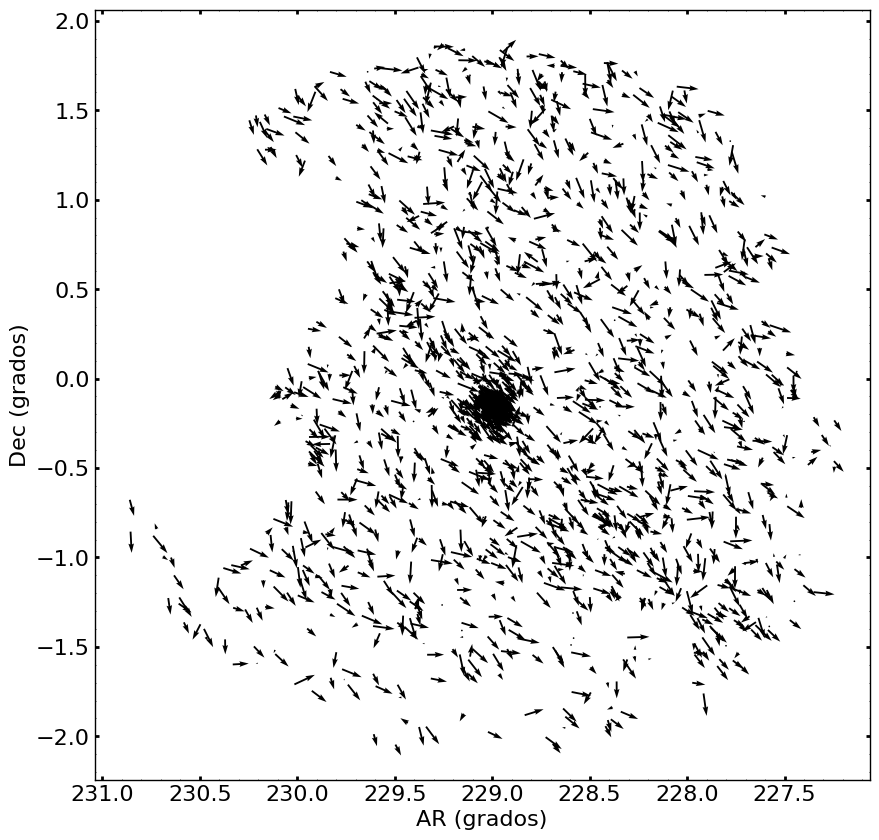

In [18]:
pm_limit = 6
pmp = np.sqrt(dfp['gaia_pmra']**2+dfp['gaia_pmdec']**2)
pmperr = np.sqrt(dfp['gaia_pmra_err']**2+dfp['gaia_pmdec_err']**2)
lpm = pmp<pm_limit
x0 = dfp[lpm]['ra']
y0 = dfp[lpm]['dec']
dx = dfp[lpm]['gaia_pmra']
dy = dfp[lpm]['gaia_pmdec']

fig = plt.figure(figsize=(10,10))
plt.quiver(x0,y0,flip*dx,dy,scale_units='width',scale=200)
plt.xlabel('AR (grados)')
plt.ylabel('Dec (grados)')
if east_left: plt.gca().invert_xaxis()
plt.show()

Tomemos el movimiento propio medio de Pal 5 y restémoslo de nuestros vectores para ver los movimientos propios en el marco de referencia de Pal 5.  En la siguiente figura, parece que podríamos recortar un poco más los movimientos propios para aislar a Pal 5 y sus colas.

In [19]:
core = (x0>228.9) & (x0<229.1) & (y0>-0.2) & (y0<0) # núcleos de Pal 5
mpmra = np.mean(dx[core])
mpmdec = np.mean(dy[core])
dxp5 = dx - mpmra
dyp5 = dy - mpmdec
print(mpmra,mpmdec)

-2.489933011331422 -2.5776829536639236


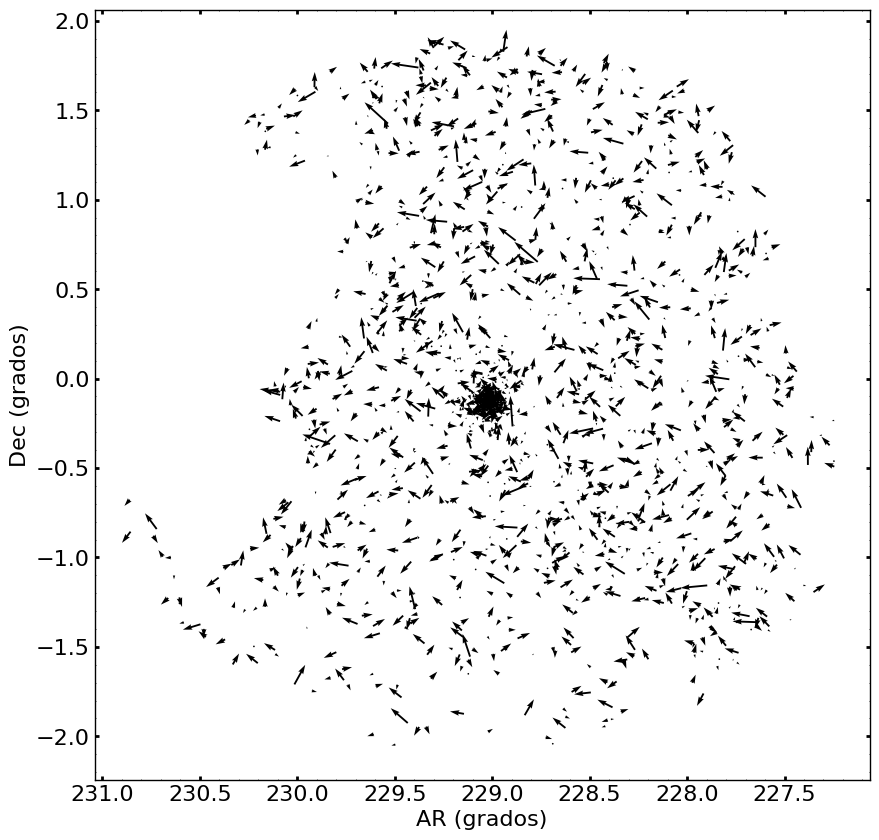

In [20]:
fig = plt.figure(figsize=(10,10))
plt.quiver(x0,y0,flip*dxp5,dyp5,scale_units='width',scale=200)
plt.xlabel('AR (grados)')
plt.ylabel('Dec (grados)')
if east_left: plt.gca().invert_xaxis()
plt.show()

En la siguiente figura, solo mostraremos puntos que tienen movimientos propios cercanos a los de Pal 5 dentro de algún límite.  Elimina un poco más de contaminación.

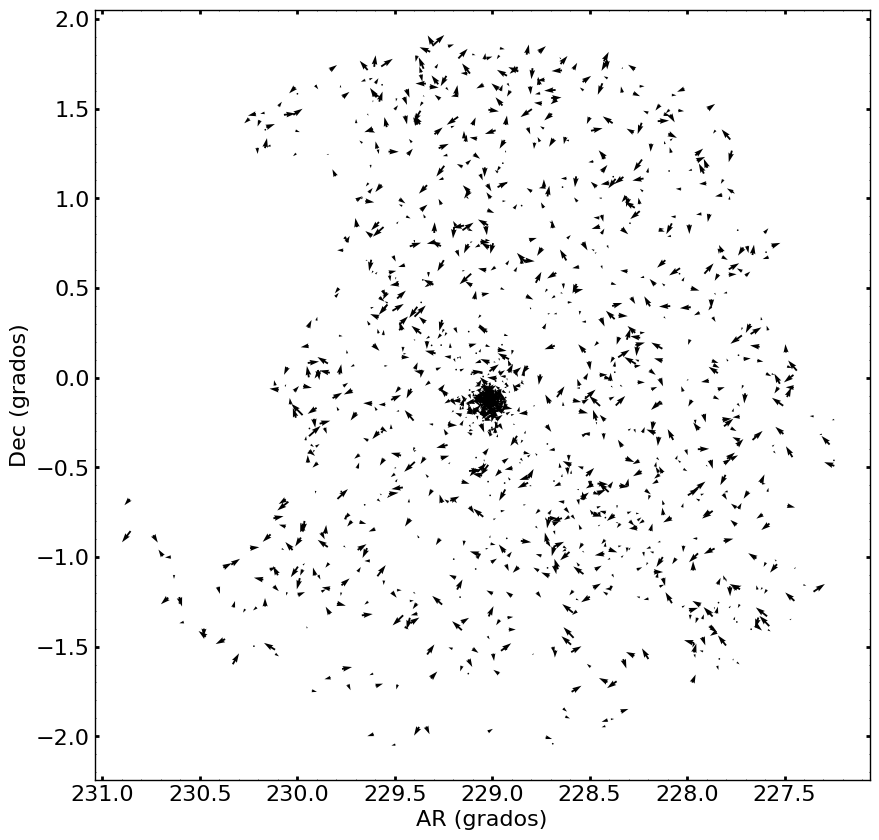

In [21]:
lim = 3. # Intenta experimentar con este corte de movimiento propio.
p5 = (np.abs(dxp5)<lim)&(np.abs(dyp5)<lim)
fig = plt.figure(figsize=(10,10))
plt.quiver(x0[p5],y0[p5],flip*dxp5[p5],dyp5[p5],scale_units='width',scale=200)
plt.xlabel('AR (grados)')
plt.ylabel('Dec (grados)')
if east_left: plt.gca().invert_xaxis()
plt.show()

Veamos qué sucede cuando aplicamos nuestro filtro espacial a esta muestra seleccionada por movimiento propio.  Destaca claramente la cola norte.

In [22]:
rp5, ep5, dp5, cp5, sp5 = dwarf_filter(x0[p5],y0[p5],fwhm_small=8.0,fwhm_big=120)

Calculando la convolución diferencial...
Listo.


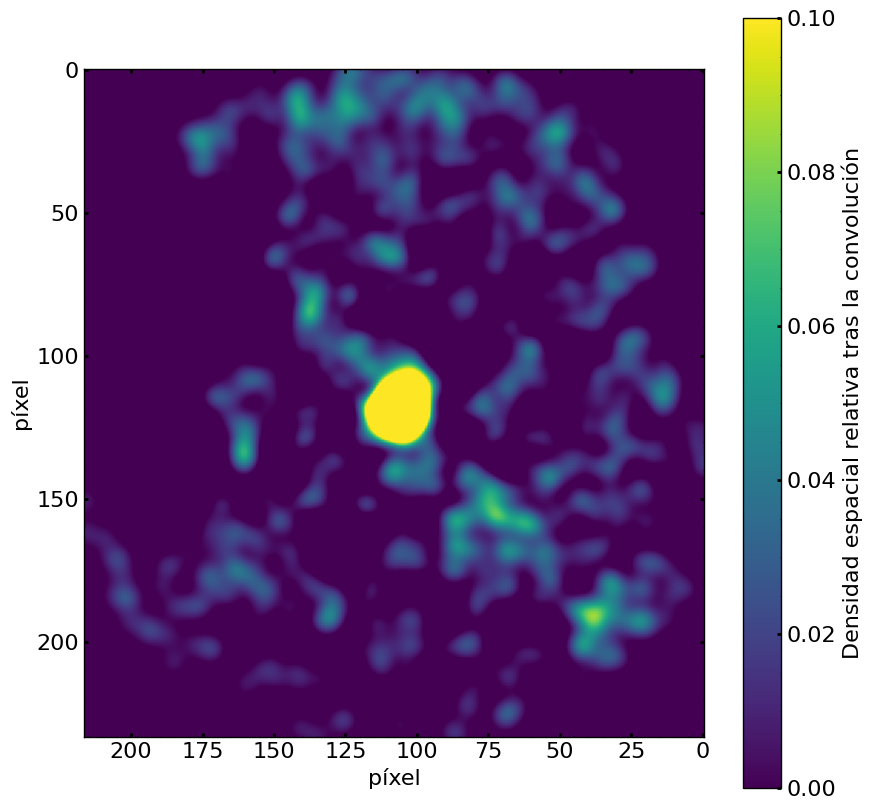

In [23]:
fig = plt.figure(figsize=(10,10))
im = plt.imshow(dp5,vmin=0.0,vmax=0.1)
plt.gca().invert_xaxis()
plt.xlabel('píxel')
plt.ylabel('píxel')
plt.colorbar(label='Densidad espacial relativa tras la convolución')
plt.show()